In [4]:
# load packages
import pandas as pd
import numpy as np
import copy

import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import seaborn as sns
import string

plt.style.use('ggplot')
sns.set_theme(style="white")
sns.set_theme(style="ticks")

We will use seaborn for plotting, which essentially expands the matplotlib toolbox.

We will pass our datafarames directly into our plotting functions, rather than passing vectors associated with each variable we want to plot.

In [5]:
# load the data
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df['Species'] = pd.Series(iris.target).map({0: 'setosa', 
                                            1: 'versicolor', 
                                            2: 'virginica'}).tolist()
# convert from dtype object
df['Species'] = df['Species'].astype("string") 

# format column names
col_names = [col.replace('(cm)', '').replace(' ', '_')[:-1] for col in df.columns]
col_names[-1] = 'Species'
df.columns = col_names 

df.head()

,sepal_length,sepal_width,petal_length,petal_width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Scatter Plot & Syntax

Instead of exploring all the different types of plots and their arguments, we will focus on the simple example of scatter plots to understand syntax and how visualizations can be customized/manipulated from the default.

This notebook is just a small subset of all the customization options available for visualization meant to give you a sense of how using code to generate figures works. Additionally, many of the figure modifications shown here can be done in multiple different ways.


Let's plot the two **continuous** variables sepal length vs sepal width, and color it by the **categorical/discrete** variable species:

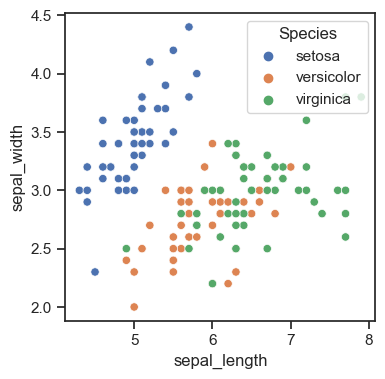

In [6]:
fig, ax = plt.subplots(figsize = (4,4)) # set up the figure and axes objects
g = sns.scatterplot(data = df, x = 'sepal_length', 
                    y = 'sepal_width', hue = 'Species', ax = ax)

## Coloring

Suppose we want to change the colors for the Species category. We can do so by specifying a color pallette. Seaborn color palettes can be found here: https://seaborn.pydata.org/tutorial/color_palettes.html

Since this is a categorical variable, we want a discrete color palette:

In [7]:
sns.color_palette("Set2")

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

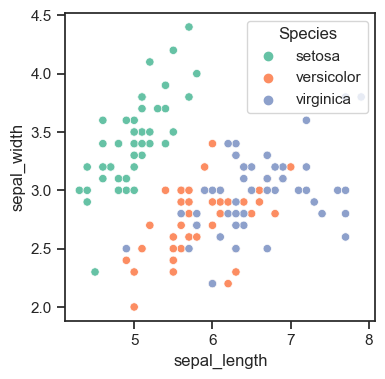

In [8]:
fig, ax = plt.subplots(figsize = (4,4)) # set up the figure and axes objects
g_main = sns.scatterplot(data = df, x = 'sepal_length', 
                         y = 'sepal_width', hue = 'Species', 
                         palette = 'Set2', ax = ax)

Note, we can also manually specify the colors that we want. Color codes for python can be found here: https://matplotlib.org/stable/gallery/color/named_colors.html

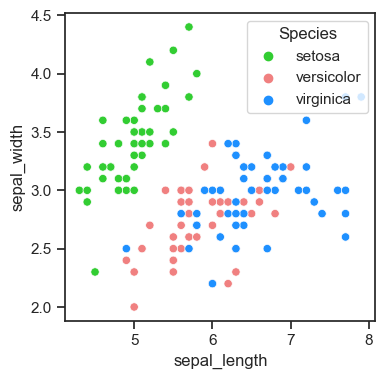

In [9]:
fig, ax = plt.subplots(figsize = (4,4)) # set up the figure and axes objects
g = sns.scatterplot(data = df, x = 'sepal_length', 
                    y = 'sepal_width', hue = 'Species', 
                   palette = ['limegreen', 'lightcoral', 'dodgerblue'], ax = ax)

Finally, suppose we want to **change the order** of the species in our legend and/or change the colors that match each category. There are many options to do this (e.g., manually customize the legend labels, change the order of the specified colors). We will proceed with setting the Species column as a categorical variable, as this allows the most flexibility and can be used in other plots without additional code. 

We can see that right now, the Species column is a string rather than a categorical variable:

In [10]:
df.Species.dtype

string[python]

Let's set the order to be: 1) versicolor, 2) virginica, 3) setosa:

In [11]:
df['Species'] = pd.Categorical(df.Species, categories = ['versicolor', 'virginica', 'setosa'], 
                              ordered = True) # set the categories
df.Species.unique()

['setosa', 'versicolor', 'virginica']
Categories (3, object): ['versicolor' < 'virginica' < 'setosa']

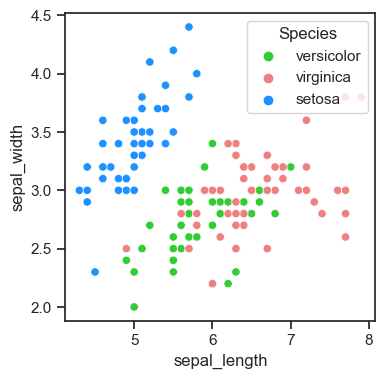

In [12]:
fig, ax = plt.subplots(figsize = (4,4)) # set up the figure and axes objects
g = sns.scatterplot(data = df, x = 'sepal_length', 
                    y = 'sepal_width', hue = 'Species', 
                   palette = ['limegreen', 'lightcoral', 'dodgerblue'], ax = ax)

## Subplots

Now, suppose we wanted to visualize each species in a separate subplot instead:

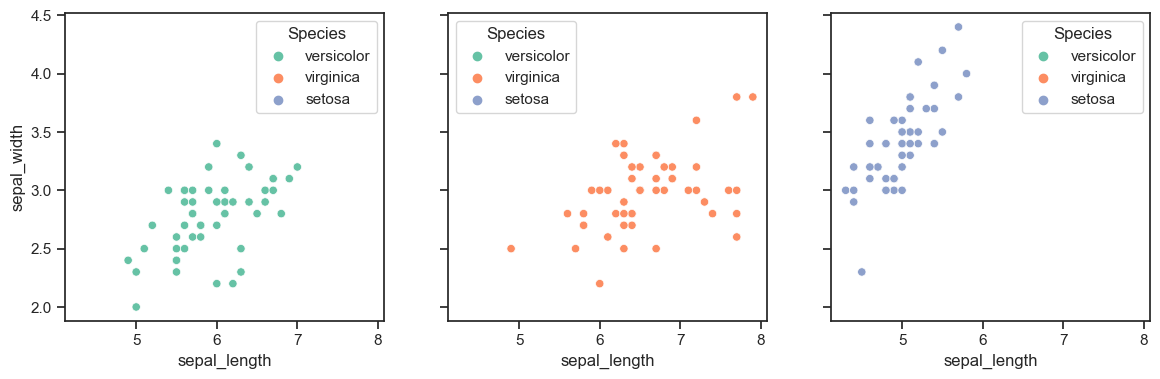

In [13]:
species = df.Species.unique().sort_values() # get the ordered categories
fig, ax = plt.subplots(ncols = 3, figsize = (14, 4), sharex=True, sharey = True)
for i in range(len(species)):
    cat = species[i]
    viz_df = df[df.Species == cat] # filter for a particular category
    g = sns.scatterplot(data = viz_df, x = 'sepal_length', y = 'sepal_width', hue = 'Species', palette = 'Set2',  
                       ax = ax[i])

Another way to do this is with faceting. This is a separate object type in seaborn that tends to make for quicker code than subplots, though customization is more difficult.

''

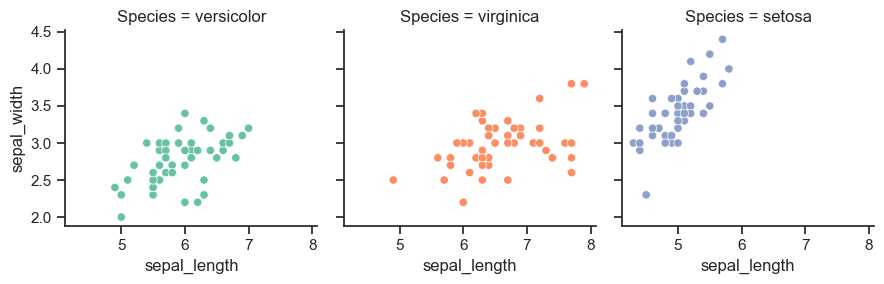

In [14]:
g = sns.FacetGrid(data = df, col = 'Species') # split by the category

# overlay scatterplot and it's arguments to the FacetGrid
g.map_dataframe(sns.scatterplot, x = 'sepal_length', y = 'sepal_width', hue = 'Species', palette = 'Set2')
;

Note that the order of the species categories is maintained from when we set it as a categorical variable.

## Overlaying multiple plot types

We can also visualize different plot types on the same figure. Suppose we want to also regress the sepal width on the sepal length. We can combine a regression and scatter plot on one figure. Note that scatterplots tend to be an optional argument within the regression plot arguments (hence why we have to set scatter to False), but the same concept of overlaying plot types can be extended to other visualizations where that is not the case.

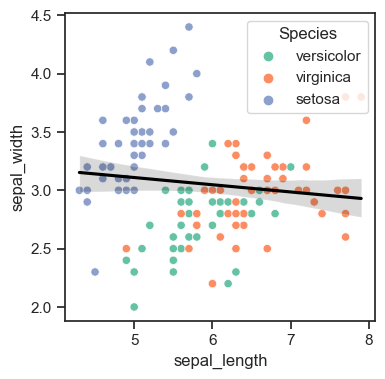

In [15]:
fig, ax = plt.subplots(figsize = (4,4)) # set up the figure and axes objects
g1 = sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'Species', 
                  palette = 'Set2', 
                     ax = ax)
g2 = sns.regplot(data = df, x = 'sepal_length', y = 'sepal_width', 
                 scatter = False, color = 'black', 
                 ax = ax) # assign to same axes object

We can also do the same thing, but on each categorical variable separately:

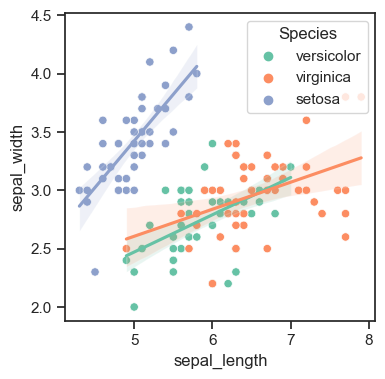

In [16]:
fig, ax = plt.subplots(figsize = (4,4)) # set up the figure and axes objects
g1 = sns.scatterplot(data = df, x = 'sepal_length', y = 'sepal_width', hue = 'Species', 
                  palette = 'Set2', ax = ax)


colors = sns.color_palette('Set2').as_hex() # get the color codes from the color palette
for i in range(len(species.sort_values())): # iterate through the categories
    cat = species[i]
    viz_df = df[df.Species == cat] # filter for a particular category
    g2 = sns.regplot(data = viz_df, x = 'sepal_length', y = 'sepal_width', scatter = False, 
                     color = colors[i], # manually specify the relevant color  
                     ax = ax) # assign to same axes object

## Manipulating Aesthetics

Many of the figure aesthetics can be manipulated by the axes object. 

### Customizing the Legend

Let's begin with our core scatter plot, but 1) place the legend on the top right of the figure, outside of the plot, 2) change the legend title to 'Category', 3) change the legend's text fonts, and 4) change the category labels to 'A', 'B', 'C':

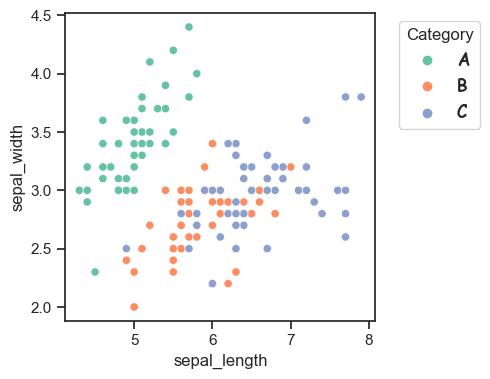

In [17]:
# modify figure we previously created
ax = g_main.axes 

font = font_manager.FontProperties(family='Comic Sans MS', weight='bold', size=12)

handles, labels = ax.get_legend_handles_labels() # to maintain categorical order, need to specify handles
ax.legend(bbox_to_anchor=(1.05,1), # move the legend
          prop = font, # change the fonts
          title = 'Category', # change the title
          labels = ['A', 'B', 'C'], # change the category labels
          handles = handles)

g_main.figure

### Changing axis labels

We can 1) rotate the x axis tick labels, 2) rename the x axis tick labels alphabetically, 3) rename the axes labels to include spaces, 4) and add a figure title, 

The axes object will has "get" methods that will allow for more robust coding; instead of manually changing parameters, we can change them as a function of what exists in the axes object. 

/var/folders/xr/d_82j7h942xgvyqjprbpncg80000gn/T/ipykernel_52133/3550127067.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels,


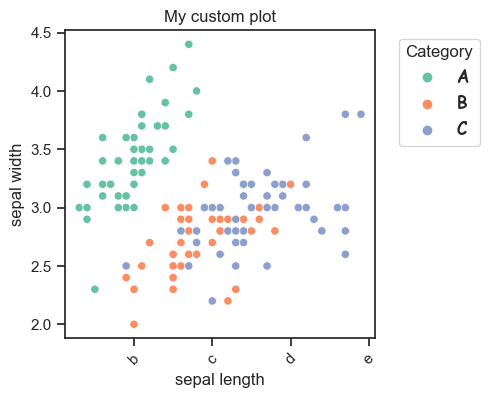

In [18]:
# modify figure we previously created
ax = g_main.axes

# relabel ticks
labels = ax.xaxis.get_ticklabels() # get current x axis labels
labels = list(string.ascii_lowercase)[:len(labels)] # reset to alphabetical
ax.set_xticklabels(labels, 
                  rotation=45) # rotate

# relabel axes to include spaces
ax.set_xlabel(ax.xaxis.label.get_text().replace('_', ' '))
ax.set_ylabel(ax.yaxis.label.get_text().replace('_', ' '))

# add a figure title
ax.set_title('My custom plot')

g_main.figure

# Challenge

Try emulating this plot as follows without installing additional packages to the environment:

1. Bin sepal width into 2 equal-interval bins -- transforming it into a discrete variable
2. Filter to exclude the setosa species
3. Visualize as a violin plot with some figure customizations

    a. Use the first three colors from the pallette 'BottleRocket1' from the R package wesanderson (hint: don't install package, just get the hex color codes, convert to RGBA for python, and manually set)
    
    
4. Annotate with a p-val non-parametric Mann-Whitney U between the two bins 
5. Annotate with a Cohen's d between bin2 vs bin1

Text(0.7, 4.15, "Cohen's d: 0.803")

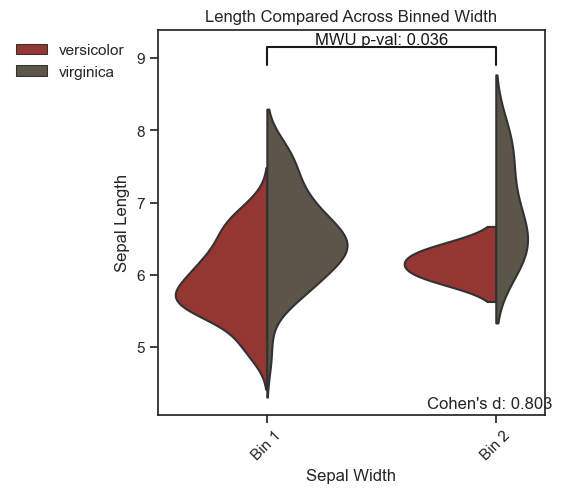

In [19]:
from scipy.stats import mannwhitneyu
from matplotlib import colors as mcolors
from statistics import mean, stdev
from math import sqrt

df_viz = df.copy()

# step 1
n_bins = 2
df_viz['sepal_width_bins'] = pd.cut(df_viz.sepal_width, bins = n_bins, include_lowest = True, duplicates = 'raise', 
      labels = ['Bin {}'.format(n_bin+1) for n_bin in range(n_bins)])

# step 2
df_viz = df_viz[df_viz.Species != 'setosa']
df_viz.Species = df_viz.Species.cat.remove_unused_categories()

# step 3
# convert wes andrerson hex colors to rgb colors
hex_colors = ["#A42820", "#5F5647"] # https://rdrr.io/cran/wesanderson/src/R/colors.R
rgb_colors = [mcolors.to_rgba(c) for c in hex_colors] #https://stackoverflow.com/questions/52652264/set-custom-seaborn-color-palette-using-hex-codes-and-name-the-colors

fig, ax = plt.subplots(figsize = (5,5))

sns.violinplot(data = df_viz, x = 'sepal_width_bins', y = 'sepal_length', hue = 'Species',
               palette = rgb_colors, inner = None, split = True)

ax.set_ylabel('Sepal Length')
ax.set_xlabel('Sepal Width')
ax.legend(bbox_to_anchor=(-0.05,1), frameon = False)
ax.set_title('Length Compared Across Binned Width')
labels = ax.xaxis.get_ticklabels() # get current x axis labels
ax.set_xticklabels(labels = labels, rotation=45) 

# step 4
bin1 = df_viz[df_viz.sepal_width_bins == 'Bin 1']['sepal_length'].tolist()
bin2 = df_viz[df_viz.sepal_width_bins == 'Bin 2']['sepal_length'].tolist()
pval = mannwhitneyu(bin1, bin2).pvalue

#https://stackoverflow.com/questions/36578458/how-does-one-insert-statistical-annotations-stars-or-p-values-into-matplotlib
x1, x2 = 0, 1  
y, h, col = df_viz.sepal_length.max() + 1, 0.25, 'k'
ax.plot([x1, x1, x2, x2], [y, y+h, y+h, y], lw=1.5, c=col)
ax.text((x1+x2)*.5, y+h, "MWU p-val: {:.3f}".format(pval), ha='center', va='bottom', color=col)

# step 5: https://machinelearningmastery.com/effect-size-measures-in-python/
from numpy import var, mean, sqrt
# function to calculate Cohen's d for independent samples
def cohend(d1, d2):
    n1, n2 = len(d1), len(d2)
    # calculate the variance of the samples
    s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
    # calculate the pooled standard deviation
    s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
    # calculate the means of the samples
    u1, u2 = mean(d1), mean(d2)
    # calculate the effect size
    return (u1 - u2) / s

# test conditions
cohens_d = (mean(bin1) - mean(bin2)) / (sqrt((stdev(bin1) ** 2 + stdev(bin2) ** 2) / 2))
ax.annotate("Cohen's d: {:.3f}".format(cohend(bin2, bin1)), xy = (0.7, 4.15))